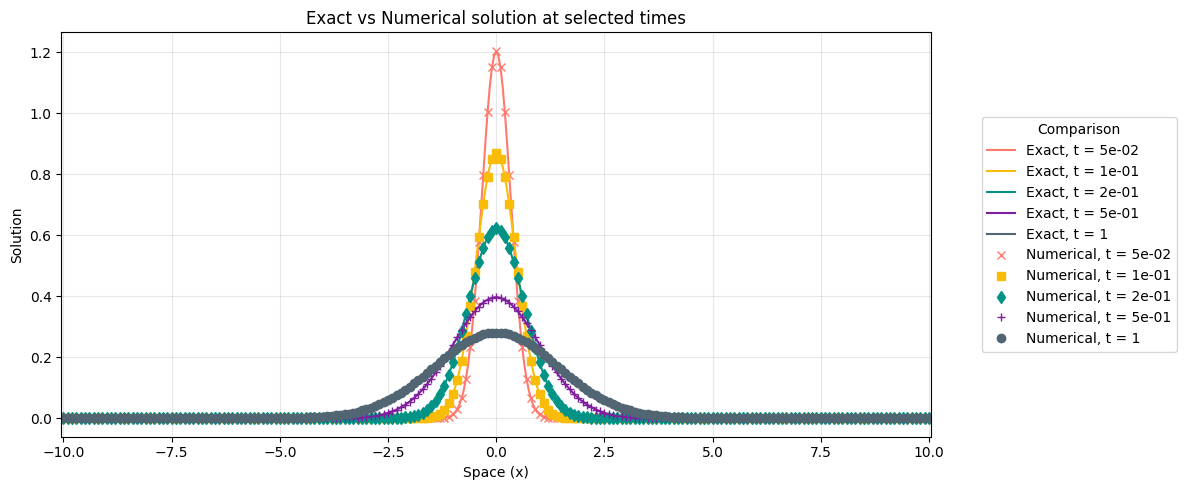

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# --- Plotting Function ---
def plotting(U, x, t, analytic_solution):
    """
    Plots the numerical and exact solutions at selected time steps.
    """
    # Grid spacing and basic info
    dx = x[1] - x[0]
    N = len(t) - 1
    T = t[-1]

    markers = ['x','s','d','+','o','.']
    colours = ['xkcd:salmon','xkcd:golden rod','xkcd:teal',
               'xkcd:purple','xkcd:slate','xkcd:silver']

    # Choose display times (spread over [0, T])
    idxs = [max(1, N//20), max(1, N//10), max(1, N//5), max(1, N//2), N]
    idxs = sorted(set(min(N, i) for i in idxs)) # deduplicate & clip

    fig, ax = plt.subplots(1, 1, figsize=(12, 5))

    # --- Plot "Exact" Solution ---
    for k, idx_t in enumerate(idxs):
        τ = t[idx_t]
        time_str = (f't = {τ:.0e}' if 0 < τ < T else f't = {τ:.0f}')
        lbl = f'Exact, {time_str}'
        line, = ax.plot(x, analytic_solution(x, τ),
                        color=colours[k % len(colours)], label=lbl)

    # --- Plot Numerical ---
    for k, idx_t in enumerate(idxs):
        τ = t[idx_t]
        time_str = (f't = {τ:.0e}' if 0 < τ < T else f't = {τ:.0f}')
        lbl = f'Numerical, {time_str}'
        # plot every other spatial point just for readability
        line, = ax.plot(x[::2], U[idx_t][::2],
                        linestyle='', marker=markers[k % len(markers)],
                        color=colours[k % len(colours)], label=lbl)

    # Create Legends
    ax.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), title='Comparison')

    ax.set_xlim(x.min() - dx, x.max() + dx)
    ax.set_xlabel("Space (x)")
    ax.set_ylabel("Solution")
    ax.set_title("Exact vs Numerical solution at selected times")
    ax.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()



# Set up
Nx_spaces = 400      # number of intervals
L = 10
Nx_points = Nx_spaces + 1
x = np.linspace(-L, L, Nx_points)

Nt_gaps = 30000
T = 1.0
Nt_points = Nt_gaps + 1
t = np.linspace(0., T, Nt_points)


dx = x[1] - x[0]
dt = t[1] - t[0]
t_exact = Nt_gaps * dt
D = 1.0 

# Initial condition
sigma0 = 2*dx # A very narrow Gaussian
u = (1.0 / np.sqrt(2*np.pi*(sigma0**2))) * np.exp(-(x)**2 / (2*sigma0**2))
u0 = u.copy()

# Analytic Solution
def analytic_solution(x, t_exact):
    u_exact = 1 / np.sqrt(2 * np.pi * (sigma0 ** 2 + 2 * t_exact)) * np.exp(-(x**2) / (2*(sigma0**2 + 2*t_exact)))
    return u_exact

# storage for all times
U = np.zeros((Nt_gaps + 1, Nx_points))
U[0] = u0.copy()

C = D * dt / dx**2 

for n in range(Nt_gaps):
    u_new = u.copy()

    for j in range(1, Nx_points - 1):
        u_new[j] = u[j] + C * (u[j+1] - 2*u[j] + u[j-1])

    # Neumann BCs (zero flux): mirror
    u_new[0]  = u_new[1]
    u_new[-1] = u_new[-2]

    u = u_new
    U[n + 1] = u

# --- Plotting Call ---
# We pass the constant D value to the analytic solution
# solution_handle = lambda x_pts, t_val: analytic_solution(x_pts, t_val, sigma0, D)

# We pass the screen bounds to the plotting function
plotting(U, x, t, analytic_solution)

